In [1]:
#This regression model only has numerical colums, this model  is the most accurate regression mode
# 'cancellation policy' & 'bathrooms' & 'minimum nights' are deleted

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)    #removes all red warnings

class color:           # lets me bold text
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#loading the dataset
dataset = pd.read_csv('AirbnbMNdata-Regression.csv')
dataset = dataset.drop(['host_is_superhost','host_identity_verified','neighbourhood_cleansed','property_type','room_type',
                        'instant_bookable','cancellation_policy','minimum_nights','bathrooms'],axis=1)
dataset["beds"] = dataset["beds"].replace(0,1)     #All beds with 0 have some sort of bed listed
print("Dataset shape before drop:", dataset.shape)

dataset = dataset.dropna(axis=0)     # Most of the dropped rows are from security deposit
print("Dataset shape after drop:", dataset.shape)

X = dataset.values
X = np.delete(X,4, axis = 1)
y = dataset.iloc[:,4].values
print("X:", X.shape)
print("y:", y.shape)
print(color.BOLD+"X column values:"+color.END, X[0,:])

#Backward Elimination 
import statsmodels.api as sm
X = np.append(arr=np.ones((4268,1)).astype(int), values=X, axis=1)

X_sig = X[:,[0,1,2,3,4,5,6,7]]

obj_OLS = sm.OLS(endog = y, exog = X_sig).fit() 
obj_OLS.summary()

print("X_sig shape:", X_sig.shape)

Dataset shape before drop: (6711, 8)
Dataset shape after drop: (4268, 8)
X: (4268, 7)
y: (4268,)
X column values: [  3.   5.   1.   1. 200. 120. 228.]
X_sig shape: (4268, 8)


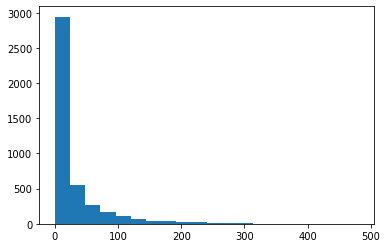

In [2]:
# Check for skewness amonst continuous data
plt.hist(X_sig[:,7], bins = 20, align='mid')
plt.show()

In [3]:
#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

#Normalizing all features that are skewed
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[1,2,3,4,5,6,7]] = sc_X.fit_transform(X_train[:,[1,2,3,4,5,6,7]])
X_test[:,[1,2,3,4,5,6,7]] = sc_X.transform(X_test[:,[1,2,3,4,5,6,7]]) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2987, 8) (1281, 8) (2987,) (1281,)


In [13]:
#######################################  Random Forest  ################################################

print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=76,random_state=0)
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

y_pred = regObj.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = np.square(np.subtract(y_test, y_pred)).mean()
print('mse: %.3f' % mse)
print('rmse: %.3f' % (mse**(1/2)))

# misclasification rate = 1- accuracy
print('score: %.3f' % (1-regObj.score(X_test,y_test))) 

#######################################  Linear Regression  ################################################

print(color.BOLD+'Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
lrObj = LinearRegression() 
lrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Multiple Linear Regression  ################################################

print(color.BOLD+'Multiple Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
mlrObj = LinearRegression() 
mlrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=mlrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Polynomial Regression  ################################################

print(color.BOLD+'Polynomial Regression'+color.END)
#Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures 
polyFeatureObj = PolynomialFeatures(degree=1) 
X_poly = polyFeatureObj.fit_transform(X_train) 
prObj = LinearRegression() 
prObj.fit(X_poly, y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=prObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

Random Forest
K-Fold Model Accuracy: 0.553
mse: 454772.453
rmse: 674.368
score: 0.702
Linear Regression
K-Fold Model Accuracy: 0.311
Multiple Linear Regression
K-Fold Model Accuracy: 0.311
Polynomial Regression


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [14]:
print(y_pred.mean())
print(np.median(y_pred))

441.8079158589664
174.8815789473684


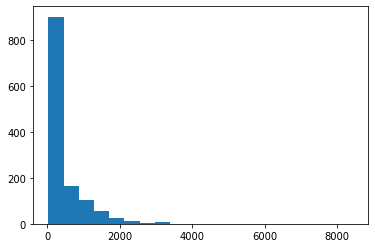

In [11]:
# Check for skewness amonst continuous data
plt.hist(y_pred, bins = 20, align='mid')
plt.show()

In [8]:
#######################################  Random Forest - Grid Search  ################################################

print(color.BOLD+'\nRandom Forest model - Grid Search'+color.END)
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(random_state=0)

grid_param = {  
    'n_estimators': [132,133,134],
    'criterion': ['mse', 'mae'],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=regObj, param_grid=grid_param, cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train) 
print(gd_sr.best_params_)  
print('%.3f' % gd_sr.best_score_)


Random Forest model - Grid Search
{'criterion': 'mae', 'n_estimators': 133}
0.589


In [10]:
print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=133,random_state=0, criterion='mae')
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

Random Forest
K-Fold Model Accuracy: 0.556


In [28]:
#######################################  Apply PCA  ################################################

#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

#Normalizing all features that are skewed
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[1,2,3,4,5]] = sc_X.fit_transform(X_train[:,[1,2,3,4,5]])
X_test[:,[1,2,3,4,5]] = sc_X.transform(X_test[:,[1,2,3,4,5]]) 
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=6,random_state=0)       #6 components is optimal
X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

print('X_train shape after PCA: ', X_train.shape)

X_train shape after PCA:  (2987, 6)


In [6]:
#######################################  Random Forest  ################################################

print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=76,random_state=0)
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Linear Regression  ################################################

print(color.BOLD+'Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
lrObj = LinearRegression() 
lrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Multiple Linear Regression  ################################################

print(color.BOLD+'Multiple Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
mlrObj = LinearRegression() 
mlrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=mlrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Polynomial Regression  ################################################

print(color.BOLD+'Polynomial Regression'+color.END)
#Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures 
polyFeatureObj = PolynomialFeatures(degree=1) 
X_poly = polyFeatureObj.fit_transform(X_train) 
prObj = LinearRegression() 
prObj.fit(X_poly, y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=prObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

Random Forest
K-Fold Model Accuracy: 0.552
Linear Regression
K-Fold Model Accuracy: 0.311
Multiple Linear Regression
K-Fold Model Accuracy: 0.311
Polynomial Regression
K-Fold Model Accuracy: 0.311


In [33]:
#######################################  Random Forest - Grid Search  ################################################

print(color.BOLD+'\nRandom Forest model - Grid Search'+color.END)
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(random_state=0)

grid_param = {  
    'n_estimators': [155,161,165],
    'criterion': ['mse','mae']
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=regObj, param_grid=grid_param, cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train) 
print(gd_sr.best_params_)  
print('%.3f' % gd_sr.best_score_)


Random Forest model - Grid Search
{'criterion': 'mae', 'n_estimators': 161}
0.565


In [34]:
print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=161,random_state=0, criterion='mae')
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

Random Forest
K-Fold Model Accuracy: 0.552


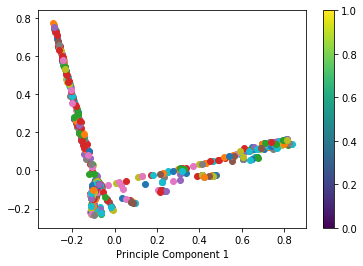

X_train shape after Kernel PCA:  (2987, 19)


In [7]:
#######################################  Apply Kernel PCA  ################################################
# When I put the kernel PCA through a loop, I judge its accuracy based on the most accurate model, in this case random forest,
#While random forest will benefit from having many componnets (over 100), I picked n_componnets that gave good accuracy and were low

#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

#Normalizing all features that are skewed
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[1,2,3,4,5]] = sc_X.fit_transform(X_train[:,[1,2,3,4,5]])
X_test[:,[1,2,3,4,5]] = sc_X.transform(X_test[:,[1,2,3,4,5]])  

#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=19, kernel='rbf',remove_zero_eig=True)  #for this metric
X_train = kernelPCAObj.fit_transform(X_train)
X_test = kernelPCAObj.transform(X_test)

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                cmap='jet', label = j)
plt.xlabel('Principle Component 1')
plt.ylabel('')
plt.colorbar()
plt.show()
print('X_train shape after Kernel PCA: ', X_train.shape)

In [8]:
#######################################  Random Forest  ################################################

print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=76,random_state=0)
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Linear Regression  ################################################

print(color.BOLD+'Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
lrObj = LinearRegression() 
lrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Multiple Linear Regression  ################################################

print(color.BOLD+'Multiple Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
mlrObj = LinearRegression() 
mlrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=mlrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())


#######################################  Polynomial Regression  ################################################

print(color.BOLD+'Polynomial Regression'+color.END)
#Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures 
polyFeatureObj = PolynomialFeatures(degree=1) 
X_poly = polyFeatureObj.fit_transform(X_train) 
prObj = LinearRegression() 
prObj.fit(X_poly, y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=prObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

Random Forest
K-Fold Model Accuracy: 0.447
Linear Regression
K-Fold Model Accuracy: 0.271
Multiple Linear Regression
K-Fold Model Accuracy: 0.271
Polynomial Regression
K-Fold Model Accuracy: 0.271


In [11]:
#######################################  Pipeline  ################################################
# Re-load the data as the first step
# Re-split up the data as it is in the 3rd step

#Creating a pipeline
print(color.BOLD+'Random Forest in pipeline'+color.END)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=6,random_state=0), RandomForestRegressor(n_estimators=76,random_state=0))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

print(pipe_lr)

Random Forest in pipeline
K-Fold Model Accuracy: 0.512
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=6,
                     random_state=0, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=76, n_jobs=None,
                 

In [ ]:
#This is here because it would look messy if I included this in the main part
#These are the for loops that you can use to find the optimal number of components/trees/etc

#######################################  Random Forest model Find # trees  ################################################
x_axis = np.arange(31,51)
y_axis, tree_val = np.ones(20),np.ones((20,2))
i = 0

for trees in range(31,51):
    #Create and Fit a Regressor Object
    from sklearn.ensemble import RandomForestRegressor
    regObj = RandomForestRegressor(n_estimators=trees,random_state=0)
    regObj.fit(X_train,y_train)
    
    #K-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
    print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean(), trees, sep='\t')
    tree_val[i,0] = modelAccuracies.mean()
    tree_val[i,1] = trees
    y_axis[i] = modelAccuracies.mean()
    i = i+1
    
print('Max Accuracy: %.3f' % np.amax(tree_val[:,0]),np.amax(tree_val[np.argmax(tree_val[:,0]),1]),sep='\t')
#plot the data    
plt.scatter(x_axis,y_axis)
plt.xlabel('trees')
plt.ylabel('Model Accuracy')
plt.show()


#######################################  Kernel PCA Find # n_components  ################################################
x_axis = np.arange(9,13)
y_axis = np.ones(4)
i = 0

for components in range(9,13):
    
    #Splitting the data into Training Set and Test Set 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

    #Normalizing all features that are skewed
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train[:,[1,2,3,4,5]] = sc_X.fit_transform(X_train[:,[1,2,3,4,5]])
    X_test[:,[1,2,3,4,5]] = sc_X.transform(X_test[:,[1,2,3,4,5]]) 

    #Applying PCA
    from sklearn.decomposition import PCA
    pcaObj = PCA(n_components=components,random_state=0)       #Uses MLE to find the # of dimensions to keep
    X_train = pcaObj.fit_transform(X_train)
    X_test = pcaObj.transform(X_test)
    components_variance = pcaObj.explained_variance_ratio_
    
    from sklearn.ensemble import RandomForestRegressor
    regObj = RandomForestRegressor(n_estimators=33,random_state=0)
    regObj.fit(X_train,y_train)

    #K-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
    print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean(), components, sep='\t')
    y_axis[i] = modelAccuracies.mean()
    i = i+1

#plot the data    
plt.scatter(x_axis,y_axis)
plt.xlabel('trees')
plt.ylabel('K-Fold Model Accuracy')
plt.show()